In [1]:
from pocs import POCS
from pocs.utils.images.calculations import get_pec_data, get_pec_fit, make_pec_fit_fn
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# Get a POCS simulator so we can use the Observer
pocs = POCS(simulator=['all'])

2016-07-18 12:41:39 ganymede panoptes[11061] INFO Loading state table: simple_state_table
2016-07-18 12:41:39 ganymede panoptes[11061] INFO ********************************************************************************
2016-07-18 12:41:39 ganymede panoptes[11061] INFO Initializing PANOPTES unit
2016-07-18 12:41:39 ganymede panoptes[11061] INFO Welcome PanTester!
2016-07-18 12:41:39 ganymede panoptes[11061] INFO 	 observatory
2016-07-18 12:41:39 ganymede pocs.observatory[11061] INFO 	Initializing observatory
2016-07-18 12:41:39 ganymede pocs.observatory[11061] INFO 		 Setting up location
2016-07-18 12:41:39 ganymede pocs.observatory[11061] INFO 		 Setting up mount
2016-07-18 12:41:39 ganymede pocs.mount.simulator[11061] INFO 		Using simulator mount
2016-07-18 12:41:39 ganymede pocs.observatory[11061] INFO 		 Setting up cameras
2016-07-18 12:41:39 ganymede pocs.camera.simulator[11061] INFO 		 Using simulator camera
2016-07-18 12:41:39 ganymede pocs.camera.simulator[11061] INFO 		 Using

## Generating a PEC graph for an image sequence

The image utils contains a function to gather all the PEC data from a specific directory, called `get_pec_data`. This function takes a directory name, guide image (will search for one in the directory), and observer (usually `pocs.observer`). The guide image has already been solved during operation so should contain a reference WCS (if the guide image is a CR2 it will automatically be converted to a FITS and solved)

In [3]:
image_seq_dir = 'Tres3/20160708T093741/'

**_Note: The function below will attempt to plate-solve all the images if they have not already been solved. This can take a while._**

In [5]:
# The cameraid_000 prefix are the 30-second exposures
pec_table = get_pec_data(image_seq_dir, img_prefix='ee04d1_000', observer=pocs.observatory.scheduler, verbose=False)

In [6]:
# Show an example of the data
pec_table.show_in_notebook(display_length=5)

time_range,dec,dt,ra,ra_as_rate,dec_as_rate,ha,dec_as,offset,ra_as
+57577.40317,+37.551,60.0,+268.027,+0.00000,+0.00000,+8.309,+0.000,60.0,+0.000
+57577.40377,+37.551,52.0,+268.028,+0.06088,-0.02779,+8.525,-1.445,112.0,+3.166
+57577.40436,+37.550,51.0,+268.025,-0.15989,-0.03012,+8.741,-1.536,163.0,-8.154
+57577.40495,+37.550,51.0,+268.021,-0.28020,-0.01828,+8.958,-0.932,214.0,-14.290
+57577.40554,+37.550,51.0,+268.018,-0.26216,-0.01848,+9.175,-0.943,265.0,-13.370
+57577.40613,+37.550,51.0,+268.014,-0.22129,-0.02013,+9.391,-1.027,316.0,-11.286
+57577.40674,+37.550,52.0,+268.015,+0.04425,-0.00045,+9.607,-0.024,368.0,+2.301
+57577.40733,+37.549,51.0,+268.017,+0.11392,-0.01904,+9.819,-0.971,419.0,+5.810
+57577.40792,+37.549,51.0,+268.020,+0.26530,-0.02410,+10.028,-1.229,470.0,+13.530
+57577.40851,+37.549,51.0,+268.025,+0.34300,-0.02340,+10.236,-1.194,521.0,+17.493


In [7]:
# Fit the data
params = get_pec_fit(pec_table)
params

array([  3.08959064,   0.28267034, -10.69954637,  -0.03298436])

In [8]:
# Create the fit function
pec_fn = make_pec_fit_fn(params)

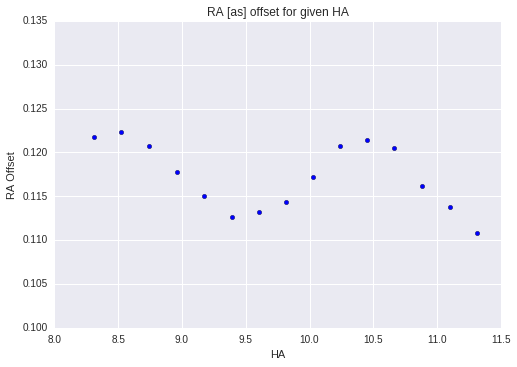

In [11]:
plt.scatter(pec_table['ha'],[pec_fn(x) for x in pec_table['ra']])
plt.xlabel('HA')
plt.ylabel('RA Offset')
plt.title("RA [as] offset for given HA")